In [1]:
# import statements

#import sys
import numpy as np
import math, scipy
import matplotlib 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import cm
from matplotlib.ticker import MultipleLocator

%matplotlib inline

In [ ]:
######################################
############ TRY SIGNAL GEN ##########
######################################

#1. Generate an amplitude per frequency across the bandpass for a single time sample
#2. Sum them together to form a time sample composed of information from all frequencies
#3. Create a 1 second time stream from that information
#4. Plot time stream
#5. Make another version of time stream with a small delay 
#6. Correlate the two together and see if I can recover the time delay

#### Effects to simulate: ####
# 1. Noise 
# 2. Gain drift in phase (Time lag)
# 3. Gain drift in amplitude 
# 4. RFI
# 5. PFB?

In [ ]:
# First, just play with generating signals at frequencies and seeing what I can recover

25.0


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


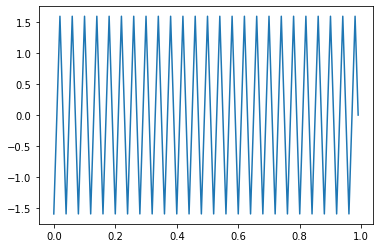

100


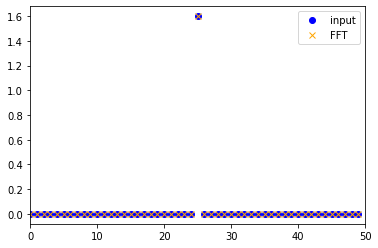

In [ ]:
# let's say we have one tone, but link time and frequency together

sample_time = 0.01 # a sample every 0.01s
maxfreq = 0.5/sample_time # that makes max freq 50Hz
freqs = np.arange(0,maxfreq,maxfreq/50.) # generate a frequency array of different frequencies, from DC to max freq
amps = np.zeros(len(freqs)) # all frequencies have no power
np.random.seed(seed=12000)
amps[int(len(amps)/2.)] = np.random.randn() # except one (single tone)
print(freqs[int(len(amps)/2.)])

t = np.arange(0,sample_time*100,sample_time) # generate a time stream, sampled at sample_time
sig = np.zeros(len(t))
for f in range(0,len(freqs)):
    sig[:] = sig[:] + amps[f]*np.exp(2.*np.pi*1.j*freqs[f]*t)

plt.plot(t,sig)
#plt.xlim(0,10)
plt.show()

plt.plot(freqs,abs(amps),'bo',label='input')

ff = 2.*np.abs(np.fft.fft(sig))/(len(sig))
print(len(ff))
fsteps = np.fft.fftfreq(len(t),d=t[1]-t[0])
plt.plot(fsteps,ff,marker='x',color='Orange',linestyle='None',label='FFT')
plt.xlim(0,maxfreq)
plt.legend()
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


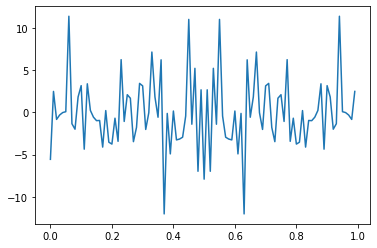

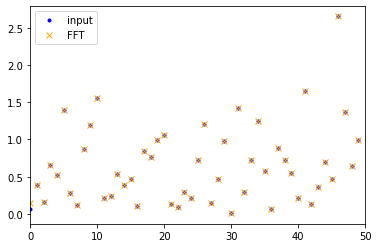

In [ ]:
# now generate a spectrum and see if we can recover it

sample_time = 0.01 # a sample every 0.01s
maxfreq = 0.5/sample_time # that makes max freq 50Hz
freqs = np.arange(0,maxfreq,maxfreq/50.) # generate a frequency array of different frequencies, from DC to max freq
amps = np.random.randn(len(freqs)) # now generate an amplitude per freq
t = np.arange(0,sample_time*100,sample_time)

 # generate a time stream, sampled at sample_time
sig = np.zeros(len(t))
for f in range(0,len(freqs)):
    sig[:] = sig[:] + amps[f]*np.exp(2.*np.pi*1.j*freqs[f]*t)

plt.plot(t,sig)
#plt.xlim(0,10)
plt.show()

#print(amps)
plt.plot(freqs,abs(amps),'b.',label='input')

ff = 2.*np.abs(np.fft.fft(sig))/(len(sig))
fsteps = np.fft.fftfreq(len(t),d=t[1]-t[0])
plt.plot(fsteps,ff,marker='x',color='orange',linestyle='None',label='FFT')
plt.xlim(0,maxfreq)
plt.legend()
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


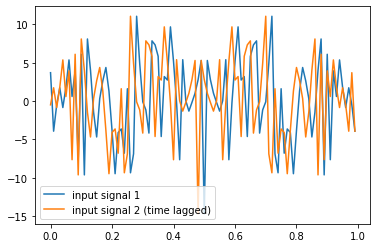

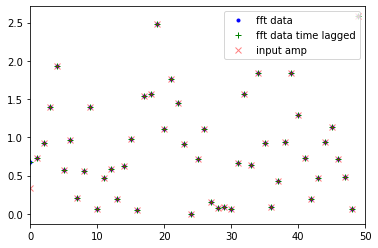

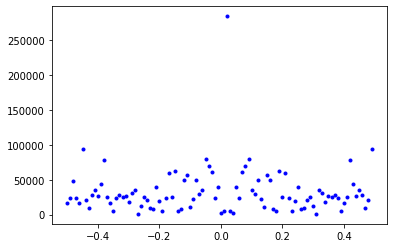

input time lag:  0.02
solved time lag: 0.02


In [ ]:
# Now let's create two copies of this signal
sample_time = 0.01 # a sample every 0.01s
maxfreq = 0.5/sample_time # that makes max freq 50Hz
freqs = np.arange(0,maxfreq,maxfreq/50.) # generate a frequency array of different frequencies, from DC to max freq
amps = np.random.randn(len(freqs)) # now generate an amplitude per freq
t = np.arange(0,sample_time*100,sample_time)

time_lag = sample_time*2
sig1 = np.zeros(len(t))
sig2 = np.zeros(len(t))
for f in range(0,len(freqs)):
    sig1[:] = sig1[:] + amps[f]*np.exp(2.*np.pi*1.j*freqs[f]*t)
    sig2[:] = sig2[:] + amps[f]*np.exp(2.*np.pi*1.j*freqs[f]*(t+time_lag))
    
plt.plot(t,sig1,label='input signal 1')
plt.plot(t,sig2,label='input signal 2 (time lagged)')
#plt.xlim(0,10)
plt.legend()
plt.show()


fft_sig1 = np.fft.fft(sig1)
fft_abs1 = 2.*np.abs(fft_sig1)/(len(sig1))
fft_sig2 = np.fft.fft(sig2)
fft_abs2 = 2.*np.abs(fft_sig2)/(len(sig2))
fsteps = np.fft.fftfreq(len(t),d=t[1]-t[0])

plt.plot(fsteps,fft_abs1,'b.',label='fft data',alpha=1.0)
plt.plot(fsteps,fft_abs2,'g+',label='fft data time lagged',alpha=1.0)
plt.plot(freqs,abs(amps),'rx',label='input amp',alpha=0.5)
plt.xlim(0,maxfreq)
plt.legend()
plt.show()

# Correlate the signals and look for lag

sig_corr = fft_sig1*fft_sig2 # this should be the equivalent of the X correlation

# check for time lag
fft_to_time = np.abs(np.fft.fft(sig_corr))
tsteps = np.fft.fftfreq(len(sig_corr),d=(fsteps[1]-fsteps[0]))
plt.plot(tsteps,fft_to_time,'b.')
#plt.xlim(0,1E-7)
plt.show()
print('input time lag: ',time_lag)
print('solved time lag:', tsteps[np.argmax(fft_to_time)])




/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


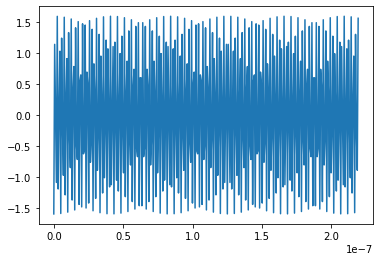

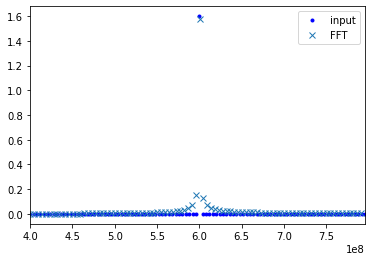

In [ ]:
# Now let's re-do but with a more realistic set of times and frequencies
# Freq range = 400-800MHz in 100 bins
# set time sampling to 4*max freq

deltaf = 400E6/100.
freqs = np.arange(400E6,800E6,deltaf)
maxfreq = max(freqs)
sample_time = 0.5/maxfreq

#np.random.seed(seed=12000)
#amps = np.random.randn(len(freqs))

amps = np.zeros(len(freqs)) # all frequencies have no power
np.random.seed(seed=12000)
amps[int(len(amps)/2.)] = np.random.randn() # except one (single tone)
#print(freqs[5])

t = np.arange(0,sample_time*350,sample_time) # generate a time stream, sampled at sample_time
sig = np.zeros(len(t))
for f in range(0,len(freqs)):
    sig[:] = sig[:] + amps[f]*np.exp(2.*np.pi*1.j*freqs[f]*t)

plt.plot(t,sig)
plt.show()

plt.plot(freqs,abs(amps),'b.',label='input')
ff = 2.*np.abs(np.fft.fft(sig))/(len(sig))
fsteps = np.fft.fftfreq(len(ff),d=t[1]-t[0])
plt.plot(fsteps,ff,marker='x',linestyle='None',label='FFT')
plt.xlim(min(freqs),maxfreq)
plt.legend()
plt.show()




/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


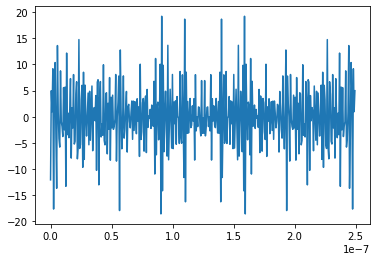

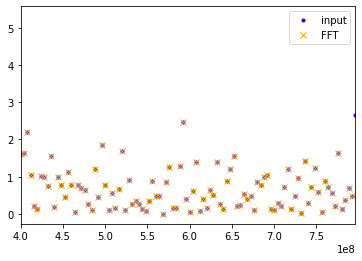

In [ ]:
# *should* remove effects of windowing. Instead, can carefully make a house of cards to reconstruct as long as:
# time stream is 1/deltaf long

deltaf = 400E6/100.
freqs = np.arange(400E6,800E6,deltaf)
maxfreq = max(freqs)
sample_time = 0.5/maxfreq
time_span = 1./deltaf

np.random.seed(seed=12000)
amps = np.random.randn(len(freqs))

t = np.arange(0,time_span,sample_time) # generate a time stream, sampled at sample_time
sig = np.zeros(len(t))
for f in range(0,len(freqs)):
    sig[:] = sig[:] + amps[f]*np.exp(2.*np.pi*1.j*freqs[f]*t)

plt.plot(t,sig)
#plt.xlim(0,10)
plt.show()

plt.plot(freqs,abs(amps),'b.',label='input')
ff = 2.*np.abs(np.fft.fft(sig))/(len(sig))
fsteps = np.fft.fftfreq(len(ff),d=t[1]-t[0])
plt.plot(fsteps,ff,marker='x',color='orange',linestyle='None',label='FFT')
plt.xlim(min(freqs),maxfreq)
plt.legend()
plt.show()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


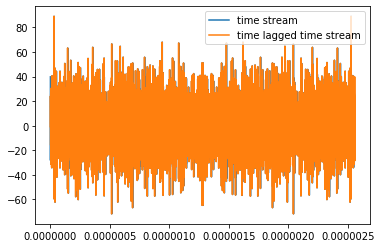

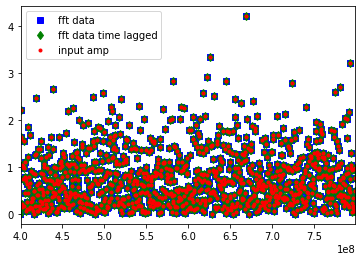

In [ ]:
deltaf = 400E6/1024.
freqs = np.arange(400E6,800E6,deltaf)
maxfreq = max(freqs)
sample_time = 0.5/(freqs[0]*2)

time_span = 1./deltaf

np.random.seed(seed=12000)
amps = np.random.randn(len(freqs))

t = np.arange(0,time_span,sample_time) # generate a time stream, sampled at sample_time

time_lag = sample_time*2

sig1 = np.zeros(len(t))
sig2 = np.zeros(len(t))
for f in range(0,len(freqs)):
    sig1[:] = sig1[:] + amps[f]*np.exp(2.*np.pi*1.j*freqs[f]*t)
    sig2[:] = sig2[:] + amps[f]*np.exp(2.*np.pi*1.j*freqs[f]*(t+time_lag))
    
plt.plot(t,sig1,label='time stream')
plt.plot(t,sig2,label='time lagged time stream')
#plt.xlim(0,10)
plt.legend()
plt.show()


fft_sig1 = np.fft.fft(sig1)
fft_abs1 = 2.*np.abs(fft_sig1)/(len(sig1))
fft_sig2 = np.fft.fft(sig2)
fft_abs2 = 2.*np.abs(fft_sig2)/(len(sig2))
fsteps = np.fft.fftfreq(len(t),d=sample_time)

plt.plot(fsteps,fft_abs1,'bs',label='fft data')
plt.plot(fsteps,fft_abs2,'gd',label='fft data time lagged')
plt.plot(freqs,abs(amps),'r.',label='input amp')
plt.xlim(min(freqs)-1,max(freqs)+1)
plt.legend()
plt.show()




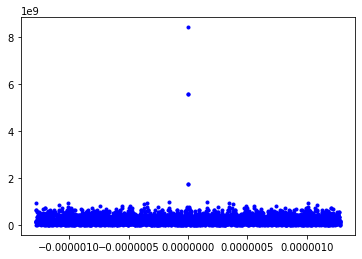

input time lag:  1.25e-09
1.25e-09


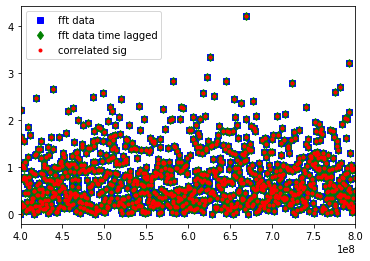

In [ ]:
# Correlate the signals and look for lag

sig_corr = fft_sig1*fft_sig2 # this should be the equivalent of the X correlation

# check for time lag
fft_to_time = np.abs(np.fft.fft(sig_corr))
tsteps = np.fft.fftfreq(len(sig_corr),d=(fsteps[1]-fsteps[0]))
plt.plot(tsteps,fft_to_time,'b.')
#plt.xlim(0,1E-7)
plt.show()
print('input time lag: ',time_lag)
print(tsteps[np.argmax(fft_to_time)])

# check if we can reconstruct the signal

plt.plot(fsteps,fft_abs1,'bs',label='fft data')
plt.plot(fsteps,fft_abs2,'gd',label='fft data time lagged')
plt.plot(fsteps,2.*np.sqrt(np.abs(sig_corr))/(len(sig_corr)),'r.',label='correlated sig')
plt.xlim(400E6,800E6)
plt.legend()
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:56: ComplexWarning: Casting complex values to real discards the imaginary part


1024


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:87: ComplexWarning: Casting complex values to real discards the imaginary part


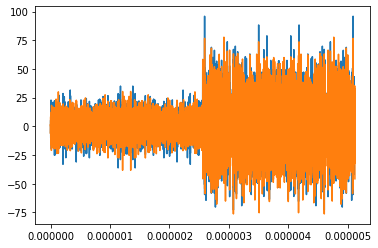

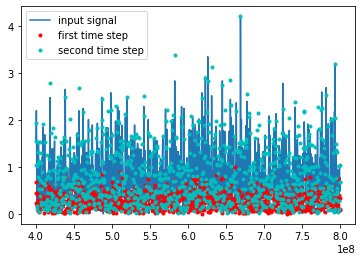

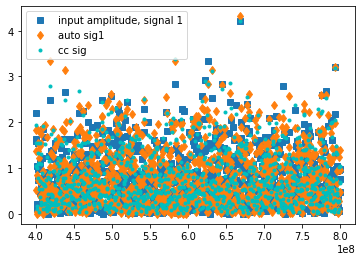

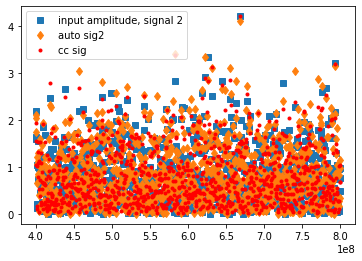

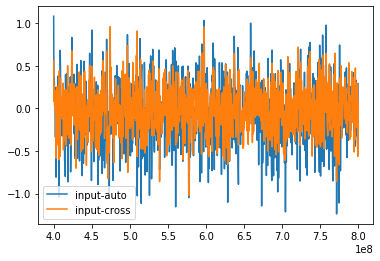

In [ ]:
###############################
########## TIME STREAM ########
###############################

# This cell has:
# a time step with signal off and noise only
# a time step with signal on, including noise
# a time lag to the second signal

###############################

# initialize frequency and time step information
deltaf = 400E6/1024.
freqs = np.arange(400E6,800E6,deltaf)
maxfreq = max(freqs)
sample_time = 0.5/(freqs[0]*2)
time_span = 1./deltaf
np.random.seed(seed=12000)
amps = np.random.randn(len(freqs))
t = np.arange(0,time_span,sample_time) # generate a time stream, sampled at sample_time

# set these variables:
snr_ratio = 0.4
time_lag = 0.0#sample_time*2.

# initialize
lt = len(t)
sig1_full = np.zeros(2*lt)
sig2_full = np.zeros(2*lt)
t_full = np.arange(0,2*time_span, sample_time)

############### SIGNAL  1: on drone #######################

#### first half of the time stream is signal off, noise only ####
# noise : set seeds near 100
np.random.seed(seed=100)
amps_noise1_ts1 = snr_ratio*np.random.randn(len(freqs))

sig1 = np.zeros(lt)
for f in range(0,len(freqs)):
    sig1[:] = sig1[:] + amps_noise1_ts1[f]*np.exp(2.*np.pi*1.j*freqs[f]*t)

sig1_ts1 = sig1 # keep first time step
sig1_full[0:lt] = sig1

#### second half of the timestream is signal and noise ####
np.random.seed(seed=101)
amps_noise1_ts2 = snr_ratio*np.random.randn(len(freqs))

# signal : set seeds near 12000
np.random.seed(seed=12000)
amps_sig1_ts2 = np.random.randn(len(freqs))

sig1 = np.zeros(lt)
for f in range(0,len(freqs)):
    sig1[:] = sig1[:] + amps_sig1_ts2[f]*np.exp(2.*np.pi*1.j*freqs[f]*t) + amps_noise1_ts2[f]*np.exp(2.*np.pi*1.j*freqs[f]*t) 

sig1_ts2 = sig1
sig1_full[lt:2*lt] = sig1

print(len(gfs))

############### SIGNAL  2: at correlator #######################

#### signal off, noise only ####
# noise : set seeds near 100
np.random.seed(seed=102)
amps_noise2_ts1 = snr_ratio*np.random.randn(len(freqs))

sig2 = np.zeros(lt)
for f in range(0,len(freqs)):
    sig2[:] = sig2[:] + amps_noise2_ts1[f]*np.exp(2.*np.pi*1.j*freqs[f]*(t+time_lag))

sig2_ts1 = sig2    
sig2_full[0:lt] = sig2

#### signal and noise ####
# noise : set seeds near 100
np.random.seed(seed=103)
amps_noise2_ts2 = snr_ratio*np.random.randn(len(freqs))
# signal : set seeds near 12000
np.random.seed(seed=12000)
amps_sig2_ts2 = np.random.randn(len(freqs))

sig2 = np.zeros(lt)
for f in range(0,len(freqs)):
    sig2[:] = sig2[:] + amps_sig2_ts2[f]*np.exp(2.*np.pi*1.j*freqs[f]*(t+time_lag)) + amps_noise2_ts2[f]*np.exp(2.*np.pi*1.j*freqs[f]*t) 

sig2_ts2 = sig2
sig2_full[lt:2*lt] = sig2


plt.plot(t_full,sig1_full)
plt.plot(t_full,sig2_full)
plt.show()

############### Now let's correlate the signals #######################

fsteps = np.fft.fftfreq(lt,d=sample_time)
gfs = np.where((fsteps<=800E6)&(fsteps>=400E6))[0]

# 
# First time step
fft_sig1_ts1 = np.fft.fft(sig1_ts1)
fft_abs1_ts1 = 2.*np.abs(fft_sig1_ts1)/(lt)

fft_sig2_ts1 = np.fft.fft(sig2_ts1)
fft_abs2_ts1 = 2.*np.abs(fft_sig2_ts1)/(lt)

sig_corr_ts1 = fft_sig1_ts1*fft_sig2_ts1 # this should be the equivalent of the X correlation

# Second time step
fft_sig1_ts2 = np.fft.fft(sig1_ts2)
fft_abs1_ts2 = 2.*np.abs(fft_sig1_ts2)/(lt)
fft_sig2_ts2 = np.fft.fft(sig2_ts2)
fft_abs2_ts2 = 2.*np.abs(fft_sig2_ts2)/(lt)

sig_corr_ts2 = fft_sig1_ts2*fft_sig2_ts2 # this should be the equivalent of the X correlation


plt.plot(freqs,abs(amps_sig1_ts2),label='input signal')
plt.plot(fsteps[gfs],2.*np.sqrt(np.abs(sig_corr_ts1[gfs]))/(lt),'r.',label='first time step')
plt.plot(fsteps[gfs],2.*np.sqrt(np.abs(sig_corr_ts2[gfs]))/(lt),'c.',label='second time step')
plt.legend()
plt.show()


################ Now let's compute what we'd attempt to measure from the auto-correlation alone ###############

plt.plot(freqs,abs(amps_sig1_ts2),marker='s',linestyle='None',label='input amplitude, signal 1')
plt.plot(fsteps[gfs],fft_abs1_ts2[gfs],marker='d',linestyle='None',label='auto sig1')
plt.plot(fsteps[gfs],2.*np.sqrt(np.abs(sig_corr_ts2[gfs]))/(lt),'c.',label='cc sig')
plt.legend()
plt.show()

plt.plot(freqs,abs(amps_sig2_ts2),marker='s',linestyle='None',label='input amplitude, signal 2')
plt.plot(fsteps[gfs],fft_abs2_ts2[gfs],marker='d',linestyle='None',label='auto sig2')
plt.plot(fsteps[gfs],2.*np.sqrt(np.abs(sig_corr_ts2[gfs]))/(lt),'r.',label='cc sig')
plt.legend()
plt.show()

plt.plot(fsteps[gfs],abs(amps_sig1_ts2)-fft_abs1_ts2[gfs],label='input-auto')
plt.plot(fsteps[gfs],abs(amps_sig1_ts2)-2.*np.sqrt(np.abs(sig_corr_ts2[gfs]))/(lt),label='input-cross')
plt.legend()
plt.show()



2.5e-07 6.188118811881189e-10 9.900990099009902e-09


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:69: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:81: ComplexWarning: Casting complex values to real discards the imaginary part


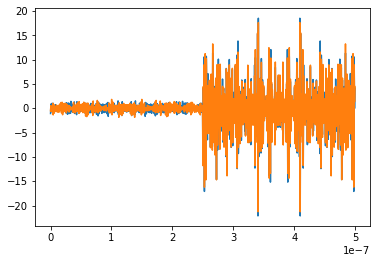

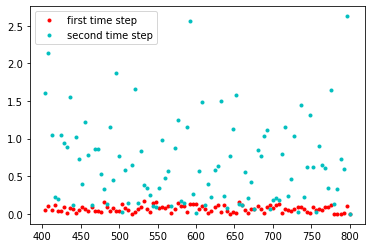

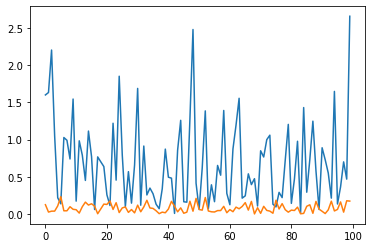

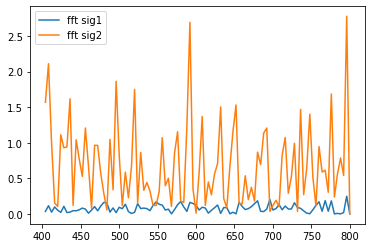

8.370782360588382


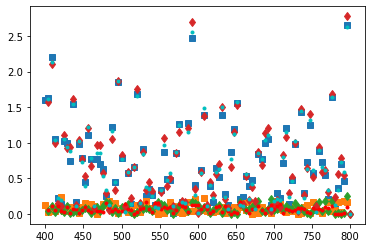

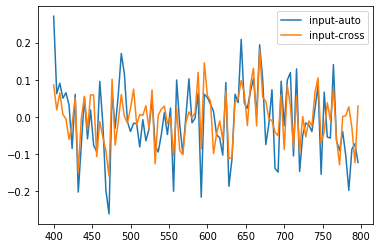

In [ ]:
###############################
########## TIME STREAM ########
###############################

# This cell has:
# a time step with signal off and noise only
# a time step with signal on, including noise
# a time lag to the second signal

###############################

# initialize frequency and time step information
deltaf = 400E6/100.
freqs = np.arange(400E6,800E6,deltaf) # generation a signal at 9 MHz
time_span = 1./deltaf#32./freqs[0] # 2 us -> 4x the generation rate
time_sample_freq = freqs[1]*4. # Hz
time_sample = 1./time_sample_freq # s
t = np.arange(0,time_span, time_sample)

print(time_span, time_sample,4./freqs[1])

# set these variables:
snr_ratio = 0.1
time_lag = 0.0#time_sample*2.

# initialize
lt = len(t)
sig1_full = np.zeros(2*lt)
sig2_full = np.zeros(2*lt)
t_full = np.arange(0,2*time_span, time_sample)


############### SIGNAL  1 #######################

#### signal off, noise only ####
# noise : set seeds near 100
np.random.seed(seed=100)
amps_noise = snr_ratio*np.random.randn(len(freqs))

sig1 = np.zeros(lt)
for f in range(0,len(freqs)):
    sig1[:] = sig1[:] + amps_noise[f]*np.exp(2.*np.pi*1.j*freqs[f]*t)
sig1_full[0:lt] = sig1

#### signal and noise ####
np.random.seed(seed=101)
amps_noise = snr_ratio*np.random.randn(len(freqs))

# signal : set seeds near 12000
np.random.seed(seed=12000)
amps_sig = np.random.randn(len(freqs))

sig1 = np.zeros(lt)
for f in range(0,len(freqs)):
    sig1[:] = sig1[:] + amps_sig[f]*np.exp(2.*np.pi*1.j*freqs[f]*t) + amps_noise[f]*np.exp(2.*np.pi*1.j*freqs[f]*t) 

sig1_full[lt:2*lt] = sig1


############### SIGNAL  2 #######################

#### signal off, noise only ####
# noise : set seeds near 100
np.random.seed(seed=102)
amps_noise = snr_ratio*np.random.randn(len(freqs))

sig2 = np.zeros(lt)
for f in range(0,len(freqs)):
    sig2[:] = sig2[:] + amps_noise[f]*np.exp(2.*np.pi*1.j*freqs[f]*(t+time_lag))
sig2_full[0:lt] = sig2

#### signal and noise ####
np.random.seed(seed=103)
amps_noise = snr_ratio*np.random.randn(len(freqs))
# signal : set seeds near 12000
np.random.seed(seed=12000)
amps_sig = np.random.randn(len(freqs))

sig2 = np.zeros(lt)
for f in range(0,len(freqs)):
    sig2[:] = sig2[:] + amps_sig[f]*np.exp(2.*np.pi*1.j*freqs[f]*(t+time_lag)) + amps_noise[f]*np.exp(2.*np.pi*1.j*freqs[f]*t) 

sig2_full[lt:2*lt] = sig2


plt.plot(t_full,sig1_full)
plt.plot(t_full,sig2_full)
plt.show()



############### Now let's correlate the signals #######################

# 
# First time step
fft_sig1 = np.fft.fft(sig1_full[0:lt])
fft_abs1 = 2.*np.abs(fft_sig1)/(lt)
fft_sig2 = np.fft.fft(sig2_full[0:lt])
fft_abs2 = 2.*np.abs(fft_sig2)/(lt)
fsteps = np.fft.fftfreq(lt,d=time_sample)/1E6
gfs = np.where((fsteps<800)&(fsteps>400))[0]

sig_corr_ts1 = fft_sig1*fft_sig2 # this should be the equivalent of the X correlation

#plt.plot(fsteps[gfs],fft_abs1[gfs],'bs',label='fft sig1')
#plt.plot(fsteps[gfs],fft_abs2[gfs],'gd',label='fft sig2')
plt.plot(fsteps[gfs],2.*np.sqrt(np.abs(sig_corr_ts1[gfs]))/(lt),'r.',label='first time step')
#plt.xlim(400,800)
#plt.legend()
#plt.show()

# Second time step
fft_sig1 = np.fft.fft(sig1_full[lt:2*lt])
fft_abs1 = 2.*np.abs(fft_sig1)/(lt)
fft_sig2 = np.fft.fft(sig2_full[lt:2*lt])
fft_abs2 = 2.*np.abs(fft_sig2)/(lt)
fsteps = np.fft.fftfreq(lt,d=time_sample)/1E6

sig_corr_ts2 = fft_sig1*fft_sig2 # this should be the equivalent of the X correlation


#plt.plot(fsteps[gfs],fft_abs1[gfs],'bs',label='fft sig1')
#plt.plot(fsteps[gfs],fft_abs2[gfs],'gd',label='fft sig2')
plt.plot(fsteps[gfs],2.*np.sqrt(np.abs(sig_corr_ts2[gfs]))/(lt),'c.',label='second time step')
#plt.xlim(400,800)
plt.legend()
plt.show()


# Now let's compute what we'd attempt to measure from the auto-correlation alone - pure power 

# first, this should be the amplitude of the autos for noise and noise+signal
plt.plot(abs(amps))
plt.plot(abs(amps_noise))
plt.show()

# 
# First time step - source off
fft_sig1 = np.fft.fft(sig1_full[0:lt])
fft_abs1 = 2.*np.abs(fft_sig1)/(lt)
fsteps = np.fft.fftfreq(lt,d=time_sample)/1E6
gfs = np.where((fsteps<800)&(fsteps>400))[0]


# Second time step
fft_sig2 = np.fft.fft(sig1_full[lt:2*lt])
fft_abs2 = 2.*np.abs(fft_sig2)/(lt)
fsteps = np.fft.fftfreq(lt,d=time_sample)/1E6

plt.plot(fsteps[gfs],fft_abs1[gfs],label='fft sig1')
plt.plot(fsteps[gfs],fft_abs2[gfs],label='fft sig2')
plt.legend()
plt.show()

print(np.median(fft_abs2[gfs]/fft_abs1[gfs]))

plt.plot(fsteps[gfs-1],abs(amps),marker='s',linestyle='None',label='input amplitude, signal+noise')
plt.plot(fsteps[gfs-1],abs(amps_noise),marker='s',linestyle='None',label='input amplitude, noise')

plt.plot(fsteps[gfs],fft_abs1[gfs],marker='d',linestyle='None',label='auto sig1')
plt.plot(fsteps[gfs],fft_abs2[gfs],marker='d',linestyle='None',label='auto sig2')

plt.plot(fsteps[gfs],2.*np.sqrt(np.abs(sig_corr_ts1[gfs]))/(lt),'r.',label='cc sig 1')
plt.plot(fsteps[gfs],2.*np.sqrt(np.abs(sig_corr_ts2[gfs]))/(lt),'c.',label='cc sig 2')
plt.show()

plt.plot(fsteps[gfs-1],abs(amps)-fft_abs2[gfs-1],label='input-auto')
plt.plot(fsteps[gfs-1],abs(amps)-2.*np.sqrt(np.abs(sig_corr_ts2[gfs-1]))/(lt),label='input-cross')
plt.legend()
plt.show()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: ComplexWarning: Casting complex values to real discards the imaginary part


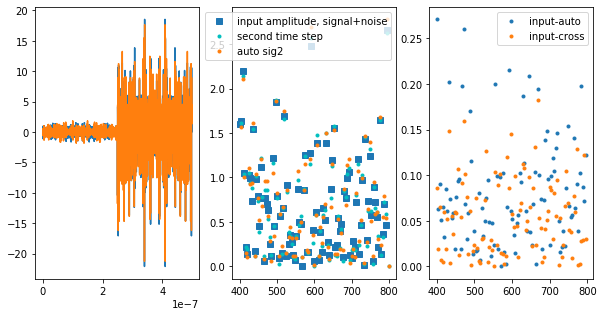

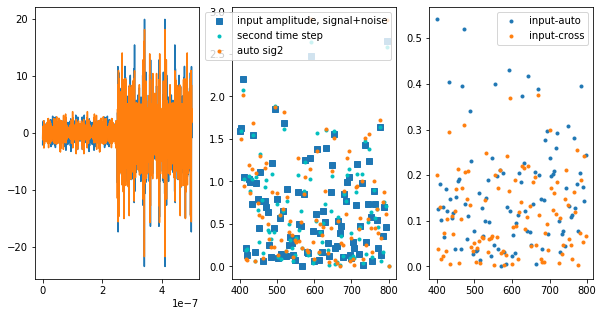

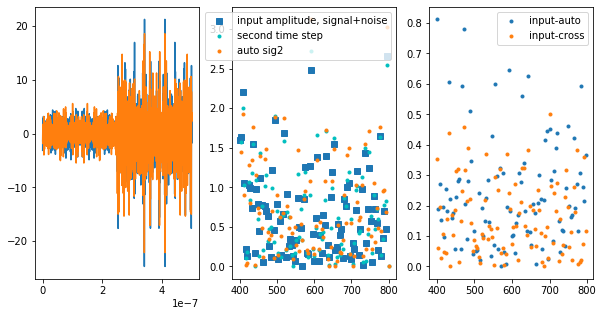

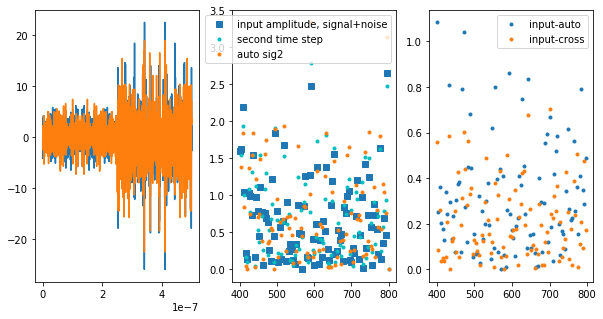

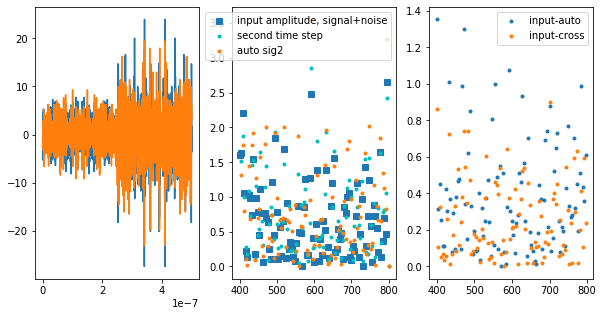

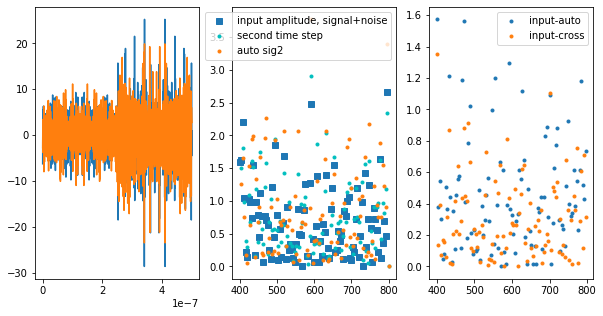

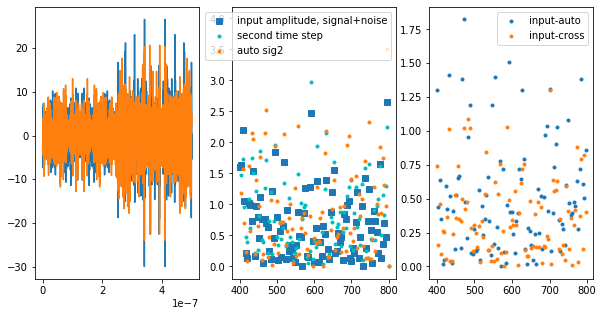

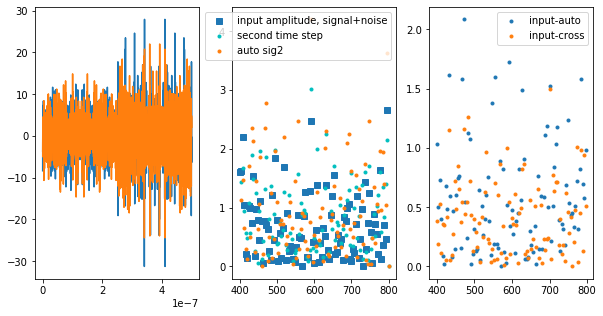

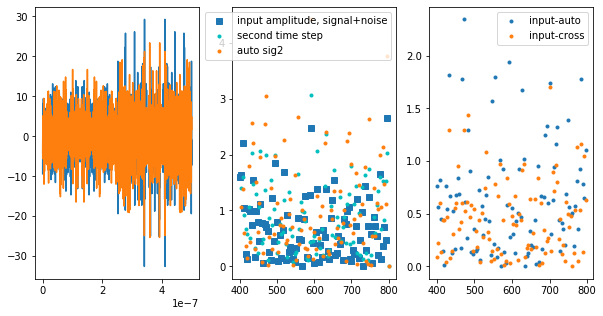

In [ ]:
# Now let's explore time shifts and other signal to noise ratios:

# set these variables:
snr_ratio = 0.5
time_lag = 0.0

# initialize
lt = len(t)
sig1_full = np.zeros(2*lt)
sig2_full = np.zeros(2*lt)
t_full = np.arange(0,2*time_span, time_sample)


snr_ratios = np.arange(0.1,1.0,0.1)
for snr_ratio in snr_ratios:
    ############### SIGNAL  1 #######################

    #### signal off, noise only ####
    # noise : set seeds near 100
    np.random.seed(seed=100)
    amps_noise = snr_ratio*np.random.randn(len(freqs))

    sig1 = np.zeros(lt)
    for f in range(0,len(freqs)):
        sig1[:] = sig1[:] + amps_noise[f]*np.exp(2.*np.pi*1.j*freqs[f]*t)
    sig1_full[0:lt] = sig1

    #### signal and noise ####
    np.random.seed(seed=101)
    amps_noise = snr_ratio*np.random.randn(len(freqs))

    # signal : set seeds near 12000
    np.random.seed(seed=12000)
    amps_sig = np.random.randn(len(freqs))

    sig1 = np.zeros(lt)
    for f in range(0,len(freqs)):
        sig1[:] = sig1[:] + amps_sig[f]*np.exp(2.*np.pi*1.j*freqs[f]*t) + amps_noise[f]*np.exp(2.*np.pi*1.j*freqs[f]*t) 

    sig1_full[lt:2*lt] = sig1


    ############### SIGNAL  2 #######################

    #### signal off, noise only ####
    # noise : set seeds near 100
    np.random.seed(seed=102)
    amps_noise = snr_ratio*np.random.randn(len(freqs))

    sig2 = np.zeros(lt)
    for f in range(0,len(freqs)):
        sig2[:] = sig2[:] + amps_noise[f]*np.exp(2.*np.pi*1.j*freqs[f]*(t+time_lag))
    sig2_full[0:lt] = sig2

    #### signal and noise ####
    np.random.seed(seed=103)
    amps_noise = snr_ratio*np.random.randn(len(freqs))
    # signal : set seeds near 12000
    np.random.seed(seed=12000)
    amps_sig = np.random.randn(len(freqs))

    sig2 = np.zeros(lt)
    for f in range(0,len(freqs)):
        sig2[:] = sig2[:] + amps_sig[f]*np.exp(2.*np.pi*1.j*freqs[f]*(t+time_lag)) + amps_noise[f]*np.exp(2.*np.pi*1.j*freqs[f]*t) 

    sig2_full[lt:2*lt] = sig2


    ############### Cross Correlation #######################

    # 
    # First time step - source off
    fft_sig1 = np.fft.fft(sig1_full[0:lt])
    fft_abs1 = 2.*np.abs(fft_sig1)/(lt)
    fft_sig2 = np.fft.fft(sig2_full[0:lt])
    fft_abs2 = 2.*np.abs(fft_sig2)/(lt)
    fsteps = np.fft.fftfreq(lt,d=time_sample)/1E6
    gfs = np.where((fsteps<800)&(fsteps>400))

    sig_corr_ts1 = fft_sig1*fft_sig2 # this should be the equivalent of the X correlation

    # Second time step - source on
    fft_sig1 = np.fft.fft(sig1_full[lt:2*lt])
    fft_abs1 = 2.*np.abs(fft_sig1)/(lt)
    fft_sig2 = np.fft.fft(sig2_full[lt:2*lt])
    fft_abs2 = 2.*np.abs(fft_sig2)/(lt)
    fsteps = np.fft.fftfreq(lt,d=time_sample)/1E6

    sig_corr_ts2 = fft_sig1*fft_sig2 # this should be the equivalent of the X correlation

    ############### Auto Correlation #######################
    # First time step - source off
    fft_sig1 = np.fft.fft(sig1_full[0:lt])
    fft_abs1 = 2.*np.abs(fft_sig1)/(lt)
    fsteps = np.fft.fftfreq(lt,d=time_sample)/1E6
    gfs = np.where((fsteps<800)&(fsteps>400))[0]

    # Second time step
    fft_sig2 = np.fft.fft(sig1_full[lt:2*lt])
    fft_abs2 = 2.*np.abs(fft_sig2)/(lt)
    fsteps = np.fft.fftfreq(lt,d=time_sample)/1E6

    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    plt.plot(t_full,sig1_full)
    plt.plot(t_full,sig2_full)
    
    plt.subplot(1,3,2)
    plt.plot(fsteps[gfs-1],abs(amps),marker='s',linestyle='None',label='input amplitude, signal+noise')
    #plt.plot(fsteps[gfs],abs(amps_noise),marker='s',linestyle='None',label='input amplitude, noise')
    #plt.plot(fsteps[gfs],2.*np.sqrt(np.abs(sig_corr_ts1[gfs]))/(lt),'r.',label='first time step')
    plt.plot(fsteps[gfs],2.*np.sqrt(np.abs(sig_corr_ts2[gfs]))/(lt),'c.',label='second time step')
    #plt.plot(fsteps[gfs],fft_abs1[gfs],label='auto sig1',marker='.',linestyle='None')
    plt.plot(fsteps[gfs],fft_abs2[gfs],label='auto sig2',marker='.',linestyle='None')
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.plot(fsteps[gfs-1],abs(abs(amps)-fft_abs2[gfs-1]),marker='.',linestyle='None',label='input-auto')
    plt.plot(fsteps[gfs-1],abs(abs(amps)-2.*np.sqrt(np.abs(sig_corr_ts2[gfs-1]))/(lt)),marker='.',linestyle='None',label='input-cross')
    plt.legend()
    plt.show()


2.5e-07 6.188118811881189e-10 9.900990099009902e-09


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:84: ComplexWarning: Casting complex values to real discards the imaginary part


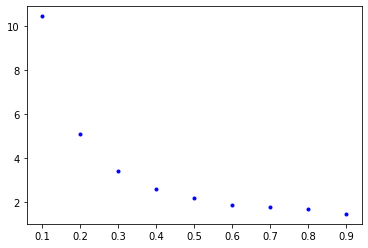

10.43387393695594


In [ ]:
###############################
########## TIME STREAM ########
###############################

# This cell has:
# a time step with signal off and noise only
# a time step with signal on, including noise
# a time lag to the second signal

###############################

# initialize frequency and time step information
deltaf = 400E6/100.
freqs = np.arange(400E6,800E6,deltaf) # generation a signal at 9 MHz
time_span = 1./deltaf#32./freqs[0] # 2 us -> 4x the generation rate
time_sample_freq = freqs[1]*4. # Hz
time_sample = 1./time_sample_freq # s
t = np.arange(0,time_span, time_sample)

print(time_span, time_sample,4./freqs[1])

# set these variables:
snr_ratio = 1.0
time_lag = time_sample*2.

# initialize
lt = len(t)
sig1_full = np.zeros(2*lt)
sig2_full = np.zeros(2*lt)
t_full = np.arange(0,2*time_span, time_sample)
sig_corr_ratio = []

snr_ratios = np.arange(0.1,1.0,0.1)
for snr_ratio in snr_ratios:
    
    ############### SIGNAL  1 #######################

    #### signal off, noise only ####
    # noise : set seeds near 100
    np.random.seed(seed=100)
    amps_noise = snr_ratio*np.random.randn(len(freqs))

    sig1 = np.zeros(lt)
    for f in range(0,len(freqs)):
        sig1[:] = sig1[:] + amps_noise[f]*np.exp(2.*np.pi*1.j*freqs[f]*t)
    sig1_full[0:lt] = sig1

    #### signal and noise ####
    np.random.seed(seed=101)
    amps_noise = snr_ratio*np.random.randn(len(freqs))

    # signal : set seeds near 12000
    np.random.seed(seed=12000)
    amps_sig = np.random.randn(len(freqs))

    sig1 = np.zeros(lt)
    for f in range(0,len(freqs)):
        sig1[:] = sig1[:] + amps_sig[f]*np.exp(2.*np.pi*1.j*freqs[f]*t) + amps_noise[f]*np.exp(2.*np.pi*1.j*freqs[f]*t) 

    sig1_full[lt:2*lt] = sig1


    ############### SIGNAL  2 #######################

    #### signal off, noise only ####
    # noise : set seeds near 100
    np.random.seed(seed=102)
    amps_noise = snr_ratio*np.random.randn(len(freqs))

    sig2 = np.zeros(lt)
    for f in range(0,len(freqs)):
        sig2[:] = sig2[:] + amps_noise[f]*np.exp(2.*np.pi*1.j*freqs[f]*(t+time_lag))
    sig2_full[0:lt] = sig2

    #### signal and noise ####
    np.random.seed(seed=103)
    amps_noise = snr_ratio*np.random.randn(len(freqs))
    # signal : set seeds near 12000
    np.random.seed(seed=12000)
    amps_sig = np.random.randn(len(freqs))

    sig2 = np.zeros(lt)
    for f in range(0,len(freqs)):
        sig2[:] = sig2[:] + amps_sig[f]*np.exp(2.*np.pi*1.j*freqs[f]*(t+time_lag)) + amps_noise[f]*np.exp(2.*np.pi*1.j*freqs[f]*t) 

    sig2_full[lt:2*lt] = sig2

    ############### Now let's correlate the signals #######################

    # 
    # First time step
    fft_sig1 = np.fft.fft(sig1_full[0:lt])
    fft_abs1 = 2.*np.abs(fft_sig1)/(lt)
    fft_sig2 = np.fft.fft(sig2_full[0:lt])
    fft_abs2 = 2.*np.abs(fft_sig2)/(lt)
    fsteps = np.fft.fftfreq(lt,d=time_sample)/1E6
    gfs = np.where((fsteps<800)&(fsteps>400))

    sig_corr = fft_sig1*fft_sig2 # this should be the equivalent of the X correlation
    sig_corr_off = 2.*np.sqrt(np.abs(sig_corr[gfs]))/(len(sig_corr))

    # Second time step
    fft_sig1 = np.fft.fft(sig1_full[lt:2*lt])
    fft_abs1 = 2.*np.abs(fft_sig1)/(lt)
    fft_sig2 = np.fft.fft(sig2_full[lt:2*lt])
    fft_abs2 = 2.*np.abs(fft_sig2)/(lt)
    fsteps = np.fft.fftfreq(lt,d=time_sample)/1E6

    sig_corr = fft_sig1*fft_sig2 # this should be the equivalent of the X correlation
    sig_corr_on = 2.*np.sqrt(np.abs(sig_corr[gfs]))/(len(sig_corr))

    sig_corr_ratio.append(np.median(sig_corr_on/sig_corr_off))
    
plt.plot(snr_ratios,sig_corr_ratio,'b.',label='SNR across band, no signal')
plt.show()

print(sig_corr_ratio[0])

In [ ]:
######################################
############ DEPRECATED ##############
######################################

######################################
############ ATTEMPT # 1 #############
######################################

# generate a complex time stream with a seed
ll = 100

np.random.seed(seed=12000)
R = np.random.randn(ll)

np.random.seed(seed=12001)
I = np.random.randn(ll)

A_orig = np.sqrt(R**2 + I**2)
ph_orig = np.arctan2(I,R)

sig = A_orig*np.exp(ph_orig*1.j)

plt.plot(sig.imag,color='black',lw=3)
plt.plot(I,color='green',linewidth=1)
plt.plot(sig.real,color='black',lw=3)
plt.plot(R,color='red',linewidth=1)
plt.show()
# can get back original real and imaginary bits (math, good)

# To get a lag, we will need to have frequency information
# generate a signal with the exponent 2*pi*i(freq*t + phase)
deltat = 2.56E-6 # s
t_FPGA = deltat*np.arange(ll)
t_drone = deltat*np.arange(ll)

# make a copy of the signal, introduce a time vector in actual time, but will ruin our ability 
# to reproduce the initial data:
deltat = 2.56E-6 # s
t_FPGA = deltat*np.arange(ll)
t_drone = deltat*np.arange(ll)

sig_FPGA = A_orig*np.exp(ph_orig*1.j*t)
sig_drone = A_orig*np.exp(ph_orig*1.j*t)

plt.plot(sig_FPGA.imag)
plt.plot(sig_drone.imag)
plt.show()

fft_FPGA = np.fft.fft(sig_FPGA)
fft_drone = np.fft.fft(sig_drone)
comb = np.fft.ifft(fft_FPGA*fft_drone)
plt.plot(np.abs(comb))
plt.show()

############ DEPRECATE #############
######################################
######################################
############ ATTEMPT # 2 #############
######################################

# Let's try generating a signal that has the same amplitude and phase
# and time lag across the whole band:

# frequency array
freqs = np.arange(400E6,800E6,400E6/1024.) # in Hz

# time array
ll = 1E5 # s
deltat = 2.56E-6 # s

t_FPGA = deltat*np.arange(ll)
t_drone = deltat*np.arange(ll)

# drone
Amp_drone = 2.0
phase_d = 0.0
lag = 0.5E-6 #4.0

sig_FPGA = np.zeros([len(freqs),len(t_FPGA)])
for f in range(0,len(freqs)):
    sig_FPGA[f,:] = Amp * np.exp(2*np.pi*1.j*(freqs[f]*(t_FPGA-lag) + phase))

plt.plot(t_FPGA,np.angle(sig_FPGA[2,:]))
plt.show()

tlag = np.abs(np.fft.fft(sig_FPGA[:,0]))
tsteps = np.fft.fftfreq(len(freqs),d=freqs[1]-freqs[0])
plt.plot(tsteps,tlag)
#plt.xlim(0,100)
plt.show()

print(np.argmax(tlag),tsteps[np.argmax(tlag)]) 